# Example of Traffic Signs' Images with Bounding Boxes' Annotations in YOLO format

## Related Course
**Training YOLO v3 for Objects Detection with Custom Data.** *Build your own detector by labelling, training and testing on image, video and in real time with camera.* Available here: https://www.udemy.com/course/training-yolo-v3-for-objects-detection-with-custom-data/

Detections on video are shown below. **Trained weights** for detection tasks can be found in the course mentioned above.
![Detections on Video](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3400968%2F11bee8c0918c092b7d256b5254ba441c%2Fts_detections.gif?generation=1581794210627123&alt=media "Detections of Traffic Signs on Video")

## Importing needed libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print()
print(os.listdir('../input'))


# Any results you write to the current directory are saved as output.


/kaggle/input/traffic-signs-dataset-in-yolo-format/yolov3_ts_train.cfg
/kaggle/input/traffic-signs-dataset-in-yolo-format/classes.names
/kaggle/input/traffic-signs-dataset-in-yolo-format/getting-full-path.py
/kaggle/input/traffic-signs-dataset-in-yolo-format/test.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts_data.data
/kaggle/input/traffic-signs-dataset-in-yolo-format/train.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/yolov3_ts_test.cfg
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00795.jpg
...
['traffic-signs-dataset-in-yolo-format']


## Reading Image ***00001.jpg*** and getting its spatial dimension

In [2]:
# Reading image with OpenCV library
# In this way image is opened already as numpy array
# WARNING! OpenCV by default reads images in BGR format
image_BGR = cv2.imread('../input/traffic-signs-dataset-in-yolo-format/ts/ts/00001.jpg')

# Showing image shape
print('Image shape:', image_BGR.shape)  # tuple of (800, 1360, 3)

# Getting spatial dimension of input image
h, w = image_BGR.shape[:2]  # Slicing from tuple only first two elements

# Showing height an width of image
print('Image height={0} and width={1}'.format(h, w))  # 800 1360


Image shape: (800, 1360, 3)
Image height=800 and width=1360


## Drawing Bounding Boxes of Traffic Signs on Image

In [3]:
# Reading annotation txt file that has bounding boxes coordinates in YOLO format
with open('../input/traffic-signs-dataset-in-yolo-format/ts/ts/00001.txt') as f:
    # Preparing list for annotation of BB (bounding boxes)
    lst = []
    for line in f:
        lst += [line.rstrip()]
        print(line)

# Going through all BB
for i in range(len(lst)):
    # Getting current bounding box coordinates, its width and height
    bb_current = lst[i].split()
    x_center, y_center = int(float(bb_current[1]) * w), int(float(bb_current[2]) * h)
    box_width, box_height = int(float(bb_current[3]) * w), int(float(bb_current[4]) * h)
    
    # Now, from YOLO data format, we can get top left corner coordinates
    # that are x_min and y_min
    x_min = int(x_center - (box_width / 2))
    y_min = int(y_center - (box_height / 2))

    # Drawing bounding box on the original image
    cv2.rectangle(image_BGR, (x_min, y_min), (x_min + box_width, y_min + box_height), [172 , 10, 127], 2)

    # Preparing text with label and confidence for current bounding box
    class_current = 'Class: {}'.format(bb_current[0])

    # Putting text with label and confidence on the original image
    cv2.putText(image_BGR, class_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_COMPLEX, 0.7, [172 , 10, 127], 2)
    

2 0.7378676470588236 0.5125 0.030147058823529412 0.055

2 0.3044117647058823 0.65375 0.041176470588235294 0.0725

3 0.736764705882353 0.453125 0.04264705882352941 0.06875



## Showing Image ***00001.jpg*** with Detected Traffic Signs

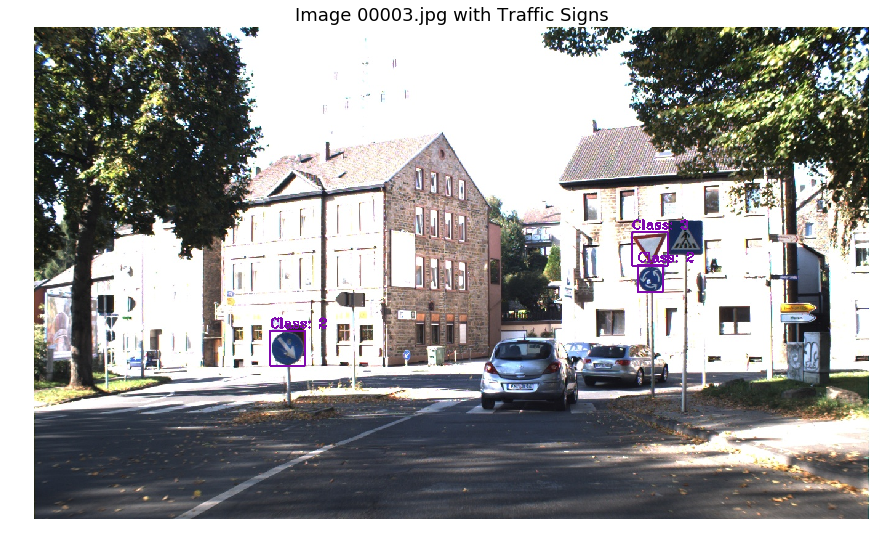

In [4]:
%matplotlib inline

# Plotting this example
# Setting default size of the plot
plt.rcParams['figure.figsize'] = (15, 15)

# Initializing the plot
fig = plt.figure()

plt.imshow(cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image 00003.jpg with Traffic Signs', fontsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('example.png')
plt.close()